# Intro

In [ ]:
#Codigos

Tickers_acoes = ['VALE3.SA', 'PETR4.SA', 'BOVA11.SA', 'DIVO11.SA']

CNPJ_Fundos = ['17.899.612/0001-60', '15.578.434/0001-40', '31.008.401/0001-11', '14.799.785/0001-19', '30.317.454/0001-51', '19.488.866/0001-11']



In [ ]:
#datas

data_limite = ('2018-09-01')
data_limite2 = ('2022-12-30')

ano = ['2018','2019','2020','2021','2022', '2023']

mes = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']

In [ ]:
#libraries

import pandas as pd
import os
import numpy as np
import xml.etree.ElementTree as ET
import requests
import zipfile
import yfinance as yf
import matplotlib.pyplot as plt

#File = "C:/Users/ZI-012/OneDrive - Zi Participações S.A/Documents/Python Scripts"

File = '/content'

Output = f'{File}/Outputs'

try:
  os.mkdir(Output)
except FileExistsError:
  print()

#CVM_Cotas = "C:/Users/ZI-012/Zi Participações S.A/Investimentos - Holding/JALF/Investimentos - FO/Projeto Relatorio FO/Inputs/CVM_Cotas"

CVM_Cotas = f'{File}/CVM_Cotas'

try:
  os.mkdir(CVM_Cotas)
except FileExistsError:
  print()


data_limite = pd.to_datetime(data_limite)
data_limite2 = pd.to_datetime(data_limite2)



meta_dado = ''



In [ ]:
#Quantum = pd.read_excel('/content/Series_05_09_2023_16_44_14.xlsx')
#Quantum.set_index('Unnamed: 0', inplace=True)

# Dados

## BCB

In [ ]:
#bcb

def url_bcb(codigo):
  return f'https://api.bcb.gov.br/dados/serie/bcdata.sgs.{codigo}/dados?formato=json'

cod_cdi = '12'
cod_ipca = '433'
cod_dolar = '1'
cod_pib = '7326'
cod_pib_agr = '7327'
cod_pib_ind = '7328'
cod_pib_ser = '7329'
cod_selic = '432'
cod_igpm = '189'


In [ ]:

#CDI

def funcao_cdi():
  global cdi
  global cdi_meta
  cdi = pd.read_json(url_bcb(cod_cdi))
  cdi["data"] = pd.to_datetime(cdi["data"], format = "%d/%m/%Y")
  data = cdi["data"]
  cdi.drop(columns =["data"], inplace = True)
  cdi = 1+(cdi/100)
  i = list(range(cdi.shape[0]))
  for int in i:
      if int == 0:
          cdi.iloc[int,:] = (cdi.iloc[int,:]*1)
      else:
          cdi.iloc[int,:] = cdi.iloc[int,:]*cdi.iloc[int-1,:]
  cdi.index = data
  cdi.rename(columns = {'valor': 'CDI'}, inplace = True)
  cdi_meta = '*cdi*: CDI diario indice'
  print(cdi_meta)

funcao_cdi()


#IPCA

def funcao_ipca():
  global ipca
  global ipca_meta
  ipca = pd.read_json(url_bcb(cod_ipca))
  ipca["data"] = pd.to_datetime(ipca["data"], format = "%d/%m/%Y")
  data = ipca["data"]
  ipca.drop(columns =["data"], inplace = True)
  ipca = 1+(ipca/100)
  i = list(range(ipca.shape[0]))
  for int in i:
      if int == 0:
          ipca.iloc[int,:] = (ipca.iloc[int,:]*1)
      else:
          ipca.iloc[int,:] = ipca.iloc[int,:]*ipca.iloc[int-1,:]
  ipca.index = data
  ipca.rename(columns = {'valor': 'IPCA'}, inplace = True)
  ipca_meta = '*ipca*: IPCA mensal indice'
  print(ipca_meta)

funcao_ipca()

#IGP-M

def funcao_igpm():
  global igpm
  global igpm_meta
  igpm = pd.read_json(url_bcb(cod_igpm))
  igpm["data"] = pd.to_datetime(igpm["data"], format = "%d/%m/%Y")
  data = igpm["data"]
  igpm.drop(columns =["data"], inplace = True)
  igpm = 1+(igpm/100)
  i = list(range(igpm.shape[0]))
  for int in i:
      if int == 0:
          igpm.iloc[int,:] = (igpm.iloc[int,:]*1)
      else:
          igpm.iloc[int,:] = igpm.iloc[int,:]*igpm.iloc[int-1,:]
  igpm.index = data
  igpm.rename(columns = {'valor': 'igpm'}, inplace = True)
  igpm_meta = '*igpm*: IGP-M mensal indice'
  print(igpm_meta)

funcao_igpm()



#Dolar

def dolar_func():
    global dolar
    global dolar_meta
    dolar = pd.read_json(url_bcb(cod_dolar))
    dolar["data"] = pd.to_datetime(dolar["data"], format = "%d/%m/%Y")
    dolar.rename(columns={"valor": "dolar"}, inplace=True)
    dolar.set_index('data', inplace=True)
    dolar_meta = '*dolar*: dolar diario'
    print(dolar_meta)
dolar_func()


#PIB

def func_pib(a, b):
    pib = pd.read_json(url_bcb(a))
    pib["data"] = pd.to_datetime(pib["data"], format = "%d/%m/%Y")
    pib.rename(columns={"valor": b}, inplace=True)
    pib.set_index('data', inplace=True)
    return pib

pib_meta = '*pib*: func_pib(cod_pib, nome)\n             |(cod_pib_agr, nome)\n             |(cod_pib_ind, nome)\n             |(cod_pib_ser, nome)'
print(pib_meta)

#Selic Meta

def funcao_selic():
  global selic
  global selic_meta
  selic = pd.read_json(url_bcb(cod_selic))
  selic["data"] = pd.to_datetime(selic["data"], format = "%d/%m/%Y")
  selic.set_index('data', inplace=True, drop=True)
  selic.rename(columns={'valor': 'SELIC META'}, inplace=True)

  selic_meta = '*selic*: selic meta copom'
  print(selic_meta)

funcao_selic()





meta_dado = f'{meta_dado}\n_____ATUALIZACAO_____\n#BCB:\n{cdi_meta}\n{ipca_meta}\n{igpm_meta}\n{dolar_meta}\n{pib_meta}\n{selic_meta}'

print('\nFIM')


*cdi*: CDI diario indice
*ipca*: IPCA mensal indice
*igpm*: IGP-M mensal indice
*dolar*: dolar diario
*pib*: func_pib(cod_pib, nome)
             |(cod_pib_agr, nome)
             |(cod_pib_ind, nome)
             |(cod_pib_ser, nome)
*selic*: selic meta copom

FIM


## Yahoo & Fred

In [ ]:
#fred

def url_fred(codigo):
  return f'https://api.stlouisfed.org/fred/series/observations?series_id={codigo}&api_key=25188dd4406ce10b3951823d2c9e7504&file_type=json'
cod_cpi = 'CPIAUCSL'
cod_cpi2 = 'GNPCA'


#CPI

def funcao_cpi():
  global cpi
  global cpi_meta
  cpi = pd.read_json(url_fred(cod_cpi))
  cpi = pd.DataFrame.from_records(cpi['observations'])
  cpi['value'] = cpi['value'].astype(float)
  cpi.drop(columns = ['realtime_start', 'realtime_end'], inplace = True)
  cpi['date'] = pd.to_datetime(cpi['date'])
  cpi.set_index('date', drop = True, inplace = True)
  cpi_meta = '*cpi*: cpi mensal indice'
  print(cpi_meta)

funcao_cpi()


#Yahoo


def busca_acoes():
  global todas_acoes
  global todas_acoes_meta
  todas_acoes_meta = []
  todas_acoes = pd.DataFrame()
  for cada_ticker in Tickers_acoes:
    acao = yf.Ticker(f'{cada_ticker}')
    acao = acao.history(period="300mo")
    acao = acao['Close']
    acao.index = pd.to_datetime(pd.to_datetime(acao.index, utc=True).date)
    acao.rename(f'{cada_ticker}', inplace = True)
    todas_acoes = pd.concat([todas_acoes, acao.sort_index()], axis = 1)
    todas_acoes.sort_index(inplace=True)
    todas_acoes_meta.append(f'{cada_ticker}')
  todas_acoes_meta = f'*todas_acoes*: {todas_acoes_meta}'
  print(todas_acoes_meta)
busca_acoes()

todas_acoes.index = pd.to_datetime(pd.to_datetime(todas_acoes.index, utc=True).date)


meta_dado = f'{meta_dado}\n_____ATUALIZACAO_____\n#Yahoo & Fred:\n{cpi_meta}\n{todas_acoes_meta}'

*cpi*: cpi mensal indice
*todas_acoes*: ['VALE3.SA', 'PETR4.SA', 'BOVA11.SA', 'DIVO11.SA']


## Cota CVM

In [ ]:
def func_Cotas_Fundos():

  global Cotas_Fundos
  Cotas_Fundos = pd.DataFrame()

  for cada_ano in ano:
    url = f'https://dados.cvm.gov.br/dados/FI/DOC/INF_DIARIO/DADOS/HIST/inf_diario_fi_{cada_ano}.zip'
    download = requests.get(url)

    with open(f'{CVM_Cotas}/inf_diario_fi_{cada_ano}.zip', 'wb') as arquivo_cvm:
      arquivo_cvm.write(download.content)
    try:
      arquivo_zip = zipfile.ZipFile(f'{CVM_Cotas}/inf_diario_fi_{cada_ano}.zip')
    except zipfile.BadZipFile:
      break
    for cada_arquivo in arquivo_zip.namelist():
      Fundo = pd.read_csv(arquivo_zip.open(cada_arquivo), sep = ';', encoding = 'ISO-8859-1')
      Fundo["DT_COMPTC"] = pd.to_datetime(Fundo["DT_COMPTC"], format = "%Y-%m-%d")
      Fundo.index = Fundo["DT_COMPTC"]
      Fundo = Fundo[Fundo['CNPJ_FUNDO'].isin(CNPJ_Fundos)]
      Cotas_Fundos = pd.concat((Cotas_Fundos, Fundo))

  for cada_ano in ano:
    for cada_mes in mes:
      url = f'https://dados.cvm.gov.br/dados/FI/DOC/INF_DIARIO/DADOS/inf_diario_fi_{cada_ano}{cada_mes}.zip'
      download = requests.get(url)

      with open(f'{CVM_Cotas}/inf_diario_fi_{cada_ano}{cada_mes}.zip', 'wb') as arquivo_cvm:
        arquivo_cvm.write(download.content)
      try:
        arquivo_zip = zipfile.ZipFile(f'{CVM_Cotas}/inf_diario_fi_{cada_ano}{cada_mes}.zip')
      except zipfile.BadZipFile:
        break
      Fundo = pd.read_csv(arquivo_zip.open(arquivo_zip.namelist()[0]), sep = ';', encoding = 'ISO-8859-1')
      Fundo["DT_COMPTC"] = pd.to_datetime(Fundo["DT_COMPTC"], format = "%Y-%m-%d")
      Fundo.index = Fundo["DT_COMPTC"]
      Fundo = Fundo[Fundo['CNPJ_FUNDO'].isin(CNPJ_Fundos)]
      Cotas_Fundos = pd.concat((Cotas_Fundos, Fundo))

  Cotas_Fundos.drop(['VL_TOTAL', 'DT_COMPTC', 'VL_PATRIM_LIQ', 'CAPTC_DIA', 'RESG_DIA', 'NR_COTST', 'TP_FUNDO'], axis = 1, inplace=True)
  variavel2 = pd.DataFrame()
  for str in CNPJ_Fundos:
      variaval1 = Cotas_Fundos.loc[Cotas_Fundos['CNPJ_FUNDO'] == str]
      variaval1 = variaval1.drop(['CNPJ_FUNDO'], axis = 1)
      variaval1 = variaval1.rename(columns = {"VL_QUOTA": str})
      variavel2 = pd.concat([variavel2, variaval1], axis = 1)
  Cotas_Fundos = variavel2
  Cotas_Fundos = Cotas_Fundos.sort_index()

  url_cad = 'https://dados.cvm.gov.br/dados/FI/CAD/DADOS/cad_fi_hist.zip'
  download = requests.get(url_cad)
  with open(f'{CVM_Cotas}/cad_fi_hist.zip', 'wb') as arquivo_cvm:
    arquivo_cvm.write(download.content)
    arquivo_zip = zipfile.ZipFile(f'{CVM_Cotas}/cad_fi_hist.zip')
  cad_fi = pd.read_csv(arquivo_zip.open('cad_fi_hist_denom_comerc.csv'), sep = ';', encoding = 'ISO-8859-1')
  cad_fi['DENOM_COMERC'] = cad_fi['DENOM_COMERC'].str.replace('FUNDO DE INVESTIMENTO EM COTAS', 'FIC').str.replace('FUNDO INVESTIMENTO EM COTAS', 'FIC').str.replace('FUNDOS DE INVESTIMENTO DE AÇÕES', 'FIA').str.replace('FUNDOS DE INVESTIMENTO MULTIMERCADO', 'FIM').str.replace('FUNDO DE INVESTIMENTO MULTIMERCADO', 'FIM').str.replace('FI MULTIMERCADO', 'FIM').str.replace('CRÉDITO PRIVADO', 'CP')
  CNPJ_dict  = cad_fi.set_index('CNPJ_FUNDO')['DENOM_COMERC'].to_dict()
  Cotas_Fundos.rename(columns = CNPJ_dict, inplace=True)

  print(f'*Cotas_Fundos*: {Cotas_Fundos.columns.to_list()}')

func_Cotas_Fundos()

meta_dado = f'{meta_dado}\n_____ATUALIZACAO_____\n#CVN:\n*Cotas_Fundos*: {Cotas_Fundos.columns.to_list()}'

*Cotas_Fundos*: ['SF2 TROPICO CASH FIM', 'ATMOS INSTITUCIONAL FIC DE FIA', 'BRADESCO MASTER ABSOLUTO PREVIDÊNCIA FIM', 'BTG PACTUAL ABSOLUTO LS FIC DE FIA', 'DAHLIA TOTAL RETURN FUNDO DE  INVESTIMENTO EM COTAS DE FIM', 'JGP CORPORATE PLUS FIC DE FIM CP']


# Analises

In [ ]:
def graf_spread(a, b):
  global spread_meta
  df = pd.merge(a.resample('A').last().pct_change(), b.resample('A').last().pct_change(), left_index=True, right_index=True, how='inner')
  df['Spread'] = (df.iloc[:,0]+1)/(df.iloc[:,1]+1)-1
  return (df.tail(28)*100).plot()

spread_meta = '*graf_spread*(a,b)\n   funcao de spread variacao anual (para índices)'

print(spread_meta)

def rent_acum(a):
  rent_acum = pd.concat([a])
  for i in rent_acum.reset_index().index:
    rent_acum.loc[rent_acum.index[i]] = a.pct_change(periods=i).loc[a.index[i]]
  return rent_acum

rent_acum_meta = '*rent_acum(a)*: Rentabalidade Acumuladad do DataFrame (a)'

print(rent_acum_meta)


def func_carteira():
  global base_carteira
  base_carteira = pd.concat([todas_acoes], axis=1).dropna().pct_change() + 1
#  base_carteira = pd.concat([todas_acoes, Cotas_Fundos], axis=1).dropna().pct_change() + 1
  print(f'escolha uma data a partir de {base_carteira.index[0]}')
  data_limite = input()
  data_limite = pd.to_datetime(data_limite)
  base_carteira = base_carteira.loc[data_limite:]
  data_salva = base_carteira.index
  base_carteira.reset_index(drop=True, inplace=True)
  for a in base_carteira.columns:
    print(f'valor de aporte em {a}')
    b = float(input())
    for c in base_carteira.index:
      if c == 0:
        base_carteira.loc[c, a] = b
      else:
        base_carteira.loc[c, a] = base_carteira.loc[c, a]*base_carteira.loc[c-1, a]
  for cada_col in base_carteira.columns:
    if base_carteira.loc[0,cada_col] == 0:
      base_carteira.drop(columns={cada_col}, inplace=True)
  base_carteira['Total'] = base_carteira.sum(axis=1)
  base_carteira.index = data_salva
  base_carteira.dropna(inplace=True)

  print(f'*base_carteira*: {base_carteira.columns.to_list()}')

  return base_carteira.drop(columns='Total').plot()

base_carteira_meta = '*func_carteira()*: Simulador de carteira acoes e fundos'




meta_dado = f'{meta_dado}\n_____ATUALIZACAO_____\n#Analises:\n{spread_meta}\n{rent_acum_meta}\n{base_carteira_meta}'

*graf_spread*(a,b)
   funcao de spread variacao anual (para índices)
*rent_acum(a)*: Rentabalidade Acumuladad do DataFrame (a)


# Playground

In [ ]:
print(meta_dado)


_____ATUALIZACAO_____
#BCB:
*cdi*: CDI diario indice
*ipca*: IPCA mensal indice
*igpm*: IGP-M mensal indice
*dolar*: dolar diario
*pib*: func_pib(cod_pib, nome)
             |(cod_pib_agr, nome)
             |(cod_pib_ind, nome)
             |(cod_pib_ser, nome)
*selic*: selic meta copom
_____ATUALIZACAO_____
#Yahoo & Fred:
*cpi*: cpi mensal indice
*todas_acoes*: ['VALE3.SA', 'PETR4.SA', 'BOVA11.SA', 'DIVO11.SA']
_____ATUALIZACAO_____
#CVN:
*Cotas_Fundos*: ['SF2 TROPICO CASH FIM', 'ATMOS INSTITUCIONAL FIC DE FIA', 'BRADESCO MASTER ABSOLUTO PREVIDÊNCIA FIM', 'BTG PACTUAL ABSOLUTO LS FIC DE FIA', 'DAHLIA TOTAL RETURN FUNDO DE  INVESTIMENTO EM COTAS DE FIM', 'JGP CORPORATE PLUS FIC DE FIM CP']
_____ATUALIZACAO_____
#Analises:
*graf_spread*(a,b)
   funcao de spread variacao anual (para índices)
*rent_acum(a)*: Rentabalidade Acumuladad do DataFrame (a)
*func_carteira()*: Simulador de carteira acoes e fundos


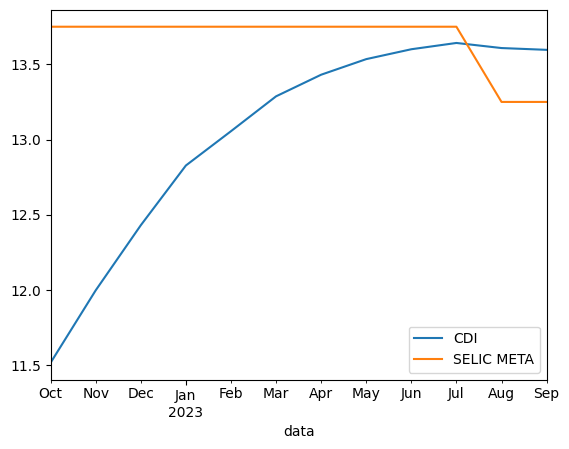

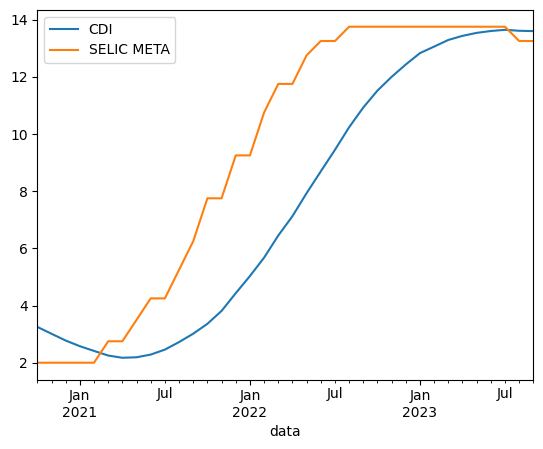

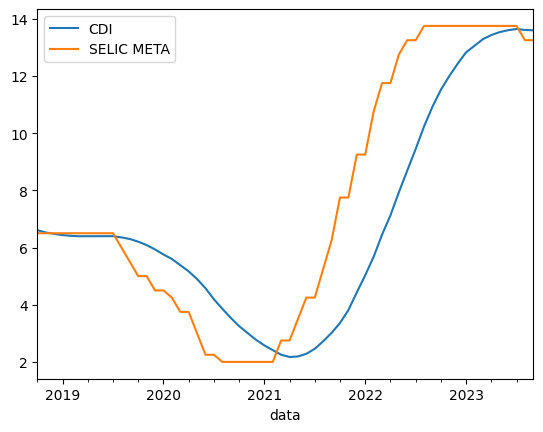

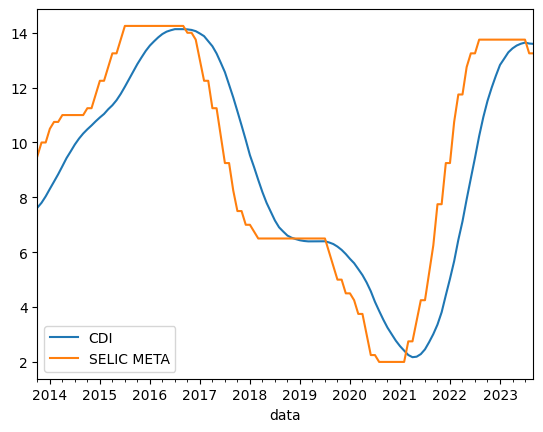

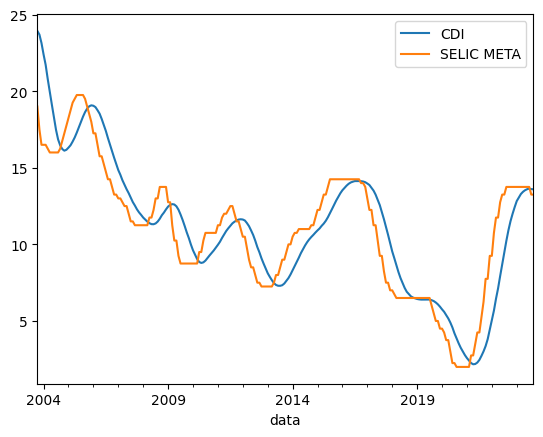

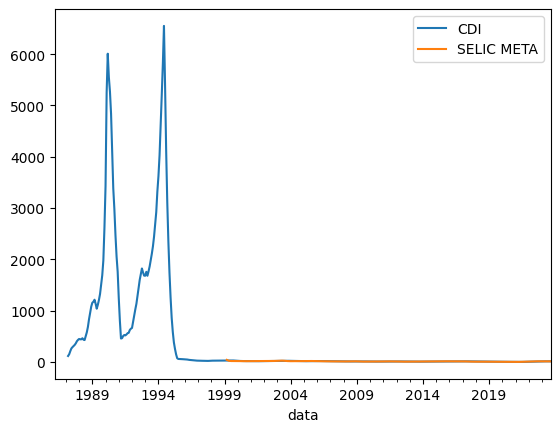

In [ ]:
for n in [12, 36, 60, 120, 240, 99999]:
  teste = pd.concat([cdi.pct_change(periods=252)*100, selic], axis=1)
  teste = teste.resample('M').last()
  teste.tail(n).plot()